In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv ('esigar.csv', sep = ";", encoding = "latin-1")
df.head()

,nom,annee,prix_de_vente,kilometrage,carburant,type_vendeur,transmission,proprietaire,consommation,moteur,puissance,couple,nb_sieges
0,Toyota Corolla Altis 1.8 J,2009,3995,82000,Essence,Individuel,Manuel,Deuxième Propriétaire,14.53 kmpl,1798 CC,138 bhp,173Nm@ 4000rpm,5.0
1,Toyota Fortuner 4x4 MT,2015,23500,20000,Diesel,Individuel,Manuel,Premier Propriétaire,12.55 kmpl,2982 CC,168.5 bhp,343Nm@ 1400-3400rpm,7.0
2,Hyundai Verna Transform CRDi VGT SX ABS,2010,3760,70000,Diesel,Individuel,Manuel,Deuxième Propriétaire,16.2 kmpl,1493 CC,110 bhp,24 KGM at 1900-2750 RPM,5.0
3,Ford Figo Diesel Titanium,2011,1821,80000,Diesel,Individuel,Manuel,Troisième Propriétaire,20.0 kmpl,1399 CC,68 bhp,160Nm@ 2000rpm,5.0
4,Volkswagen Polo 2015-2019 1.0 MPI Comfortline,2019,6874,10000,Essence,Individuel,Manuel,Premier Propriétaire,18.78 kmpl,999 CC,75 bhp,95Nm@ 3000-4300rpm,5.0


## Analyse du jeu de données

In [4]:
# Combien de lignes sont vide ?

df.isnull().sum()

nom                0
annee              0
prix_de_vente      0
kilometrage        0
carburant          0
type_vendeur       0
transmission       0
proprietaire       0
consommation     218
moteur           218
puissance        212
couple           219
nb_sieges        218
dtype: int64

In [5]:
# 2.7% des lignes du dataset contient des données manquante, je décide de les supprimer estimant que c'est négligeable

df = df.dropna()

In [6]:
df.isnull().sum()

nom              0
annee            0
prix_de_vente    0
kilometrage      0
carburant        0
type_vendeur     0
transmission     0
proprietaire     0
consommation     0
moteur           0
puissance        0
couple           0
nb_sieges        0
dtype: int64

#### Prétraitement du paramètre couple

In [7]:
# On sépare la colonne couple en 3 pour pouvoir prendre en compte le fait qu'on ait souvent des plages de couples
# dans ses cas on prendra la moyenne 

df["couple_nm"] = df["couple"].apply(lambda x:re.findall("\d+", x)).str[0].astype(float)
df["couple_rpm_min"] = df["couple"].apply(lambda x:re.findall("\d+", x)).str[1].astype(float)
df["couple_rpm_max"] = df["couple"].apply(lambda x:re.findall("\d+", x)).str[2].astype(float)
df.head()

,nom,annee,prix_de_vente,kilometrage,carburant,type_vendeur,transmission,proprietaire,consommation,moteur,puissance,couple,nb_sieges,couple_nm,couple_rpm_min,couple_rpm_max
0,Toyota Corolla Altis 1.8 J,2009,3995,82000,Essence,Individuel,Manuel,Deuxième Propriétaire,14.53 kmpl,1798 CC,138 bhp,173Nm@ 4000rpm,5.0,173.0,4000.0,NaN
1,Toyota Fortuner 4x4 MT,2015,23500,20000,Diesel,Individuel,Manuel,Premier Propriétaire,12.55 kmpl,2982 CC,168.5 bhp,343Nm@ 1400-3400rpm,7.0,343.0,1400.0,3400.0
2,Hyundai Verna Transform CRDi VGT SX ABS,2010,3760,70000,Diesel,Individuel,Manuel,Deuxième Propriétaire,16.2 kmpl,1493 CC,110 bhp,24 KGM at 1900-2750 RPM,5.0,24.0,1900.0,2750.0
3,Ford Figo Diesel Titanium,2011,1821,80000,Diesel,Individuel,Manuel,Troisième Propriétaire,20.0 kmpl,1399 CC,68 bhp,160Nm@ 2000rpm,5.0,160.0,2000.0,NaN
4,Volkswagen Polo 2015-2019 1.0 MPI Comfortline,2019,6874,10000,Essence,Individuel,Manuel,Premier Propriétaire,18.78 kmpl,999 CC,75 bhp,95Nm@ 3000-4300rpm,5.0,95.0,3000.0,4300.0


In [8]:
# On remplace couple_rpm par sa valeur moyenne pour les cas ou il y'a un plage de valeurs 

df["couple_rpm"] = df[["couple_rpm_min", "couple_rpm_max"]].mean(1)
df.head()

,nom,annee,prix_de_vente,kilometrage,carburant,type_vendeur,transmission,proprietaire,consommation,moteur,puissance,couple,nb_sieges,couple_nm,couple_rpm_min,couple_rpm_max,couple_rpm
0,Toyota Corolla Altis 1.8 J,2009,3995,82000,Essence,Individuel,Manuel,Deuxième Propriétaire,14.53 kmpl,1798 CC,138 bhp,173Nm@ 4000rpm,5.0,173.0,4000.0,NaN,4000.0
1,Toyota Fortuner 4x4 MT,2015,23500,20000,Diesel,Individuel,Manuel,Premier Propriétaire,12.55 kmpl,2982 CC,168.5 bhp,343Nm@ 1400-3400rpm,7.0,343.0,1400.0,3400.0,2400.0
2,Hyundai Verna Transform CRDi VGT SX ABS,2010,3760,70000,Diesel,Individuel,Manuel,Deuxième Propriétaire,16.2 kmpl,1493 CC,110 bhp,24 KGM at 1900-2750 RPM,5.0,24.0,1900.0,2750.0,2325.0
3,Ford Figo Diesel Titanium,2011,1821,80000,Diesel,Individuel,Manuel,Troisième Propriétaire,20.0 kmpl,1399 CC,68 bhp,160Nm@ 2000rpm,5.0,160.0,2000.0,NaN,2000.0
4,Volkswagen Polo 2015-2019 1.0 MPI Comfortline,2019,6874,10000,Essence,Individuel,Manuel,Premier Propriétaire,18.78 kmpl,999 CC,75 bhp,95Nm@ 3000-4300rpm,5.0,95.0,3000.0,4300.0,3650.0


In [9]:
df = df.drop(columns=["couple_rpm_min", "couple_rpm_max"])
df.head()

,nom,annee,prix_de_vente,kilometrage,carburant,type_vendeur,transmission,proprietaire,consommation,moteur,puissance,couple,nb_sieges,couple_nm,couple_rpm
0,Toyota Corolla Altis 1.8 J,2009,3995,82000,Essence,Individuel,Manuel,Deuxième Propriétaire,14.53 kmpl,1798 CC,138 bhp,173Nm@ 4000rpm,5.0,173.0,4000.0
1,Toyota Fortuner 4x4 MT,2015,23500,20000,Diesel,Individuel,Manuel,Premier Propriétaire,12.55 kmpl,2982 CC,168.5 bhp,343Nm@ 1400-3400rpm,7.0,343.0,2400.0
2,Hyundai Verna Transform CRDi VGT SX ABS,2010,3760,70000,Diesel,Individuel,Manuel,Deuxième Propriétaire,16.2 kmpl,1493 CC,110 bhp,24 KGM at 1900-2750 RPM,5.0,24.0,2325.0
3,Ford Figo Diesel Titanium,2011,1821,80000,Diesel,Individuel,Manuel,Troisième Propriétaire,20.0 kmpl,1399 CC,68 bhp,160Nm@ 2000rpm,5.0,160.0,2000.0
4,Volkswagen Polo 2015-2019 1.0 MPI Comfortline,2019,6874,10000,Essence,Individuel,Manuel,Premier Propriétaire,18.78 kmpl,999 CC,75 bhp,95Nm@ 3000-4300rpm,5.0,95.0,3650.0


In [10]:
Corrected_couple_nm= []
for i in df['couple_nm']:
    if i<50:
        i = i*9.81
        Corrected_couple_nm.append(i)
    else : 
        Corrected_couple_nm.append(i)
        
df['couple_nm'] = Corrected_couple_nm

In [11]:
df = df.drop(columns=["couple"])
df.head()

,nom,annee,prix_de_vente,kilometrage,carburant,type_vendeur,transmission,proprietaire,consommation,moteur,puissance,nb_sieges,couple_nm,couple_rpm
0,Toyota Corolla Altis 1.8 J,2009,3995,82000,Essence,Individuel,Manuel,Deuxième Propriétaire,14.53 kmpl,1798 CC,138 bhp,5.0,173.00,4000.0
1,Toyota Fortuner 4x4 MT,2015,23500,20000,Diesel,Individuel,Manuel,Premier Propriétaire,12.55 kmpl,2982 CC,168.5 bhp,7.0,343.00,2400.0
2,Hyundai Verna Transform CRDi VGT SX ABS,2010,3760,70000,Diesel,Individuel,Manuel,Deuxième Propriétaire,16.2 kmpl,1493 CC,110 bhp,5.0,235.44,2325.0
3,Ford Figo Diesel Titanium,2011,1821,80000,Diesel,Individuel,Manuel,Troisième Propriétaire,20.0 kmpl,1399 CC,68 bhp,5.0,160.00,2000.0
4,Volkswagen Polo 2015-2019 1.0 MPI Comfortline,2019,6874,10000,Essence,Individuel,Manuel,Premier Propriétaire,18.78 kmpl,999 CC,75 bhp,5.0,95.00,3650.0


#### Suppression des unités de moteur et puissance 

In [12]:
df["moteur"] = df["moteur"].apply(lambda x:re.findall("\d+", x)).str[0].astype(float)
df["puissance"] = df["puissance"].apply(lambda x:re.findall("\d+", x)).str[0].astype(float)
df.head()

,nom,annee,prix_de_vente,kilometrage,carburant,type_vendeur,transmission,proprietaire,consommation,moteur,puissance,nb_sieges,couple_nm,couple_rpm
0,Toyota Corolla Altis 1.8 J,2009,3995,82000,Essence,Individuel,Manuel,Deuxième Propriétaire,14.53 kmpl,1798.0,138.0,5.0,173.00,4000.0
1,Toyota Fortuner 4x4 MT,2015,23500,20000,Diesel,Individuel,Manuel,Premier Propriétaire,12.55 kmpl,2982.0,168.0,7.0,343.00,2400.0
2,Hyundai Verna Transform CRDi VGT SX ABS,2010,3760,70000,Diesel,Individuel,Manuel,Deuxième Propriétaire,16.2 kmpl,1493.0,110.0,5.0,235.44,2325.0
3,Ford Figo Diesel Titanium,2011,1821,80000,Diesel,Individuel,Manuel,Troisième Propriétaire,20.0 kmpl,1399.0,68.0,5.0,160.00,2000.0
4,Volkswagen Polo 2015-2019 1.0 MPI Comfortline,2019,6874,10000,Essence,Individuel,Manuel,Premier Propriétaire,18.78 kmpl,999.0,75.0,5.0,95.00,3650.0


#### Correction du paramètre consommation
Certaines cellules de ma colonne consommation sont en km/kg tandis que d'autres sont en kmpl
1 litre d'essence pèse 700g donc on peut tout convertir en km/kg

In [13]:
Corrected_consommation= []
for i in df['consommation']:
    if str(i).endswith('km/kg'):
        i = i[:-5]
        i = float(i)*1.43
        Corrected_consommation.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-5]
        Corrected_consommation.append(float(i))
    else : 
        Corrected_consommation.append(float(i))
        
df['consommation'] = Corrected_consommation

In [14]:
df.head()

,nom,annee,prix_de_vente,kilometrage,carburant,type_vendeur,transmission,proprietaire,consommation,moteur,puissance,nb_sieges,couple_nm,couple_rpm
0,Toyota Corolla Altis 1.8 J,2009,3995,82000,Essence,Individuel,Manuel,Deuxième Propriétaire,14.53,1798.0,138.0,5.0,173.00,4000.0
1,Toyota Fortuner 4x4 MT,2015,23500,20000,Diesel,Individuel,Manuel,Premier Propriétaire,12.55,2982.0,168.0,7.0,343.00,2400.0
2,Hyundai Verna Transform CRDi VGT SX ABS,2010,3760,70000,Diesel,Individuel,Manuel,Deuxième Propriétaire,16.20,1493.0,110.0,5.0,235.44,2325.0
3,Ford Figo Diesel Titanium,2011,1821,80000,Diesel,Individuel,Manuel,Troisième Propriétaire,20.00,1399.0,68.0,5.0,160.00,2000.0
4,Volkswagen Polo 2015-2019 1.0 MPI Comfortline,2019,6874,10000,Essence,Individuel,Manuel,Premier Propriétaire,18.78,999.0,75.0,5.0,95.00,3650.0


#### Correlation des variables numériques

In [15]:
df.corr().loc["prix_de_vente"]

annee            0.411999
prix_de_vente    1.000000
kilometrage     -0.222332
consommation    -0.129107
moteur           0.456639
puissance        0.750211
nb_sieges        0.040712
couple_nm        0.623208
couple_rpm       0.012049
Name: prix_de_vente, dtype: float64

#### Doit ont garder les colonnes couple_rpm et nb_siège ?

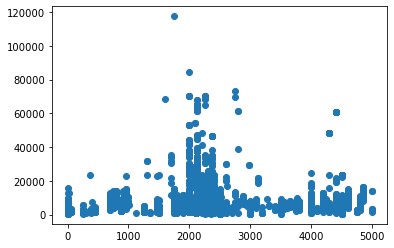

In [16]:
plt.scatter(df['couple_rpm'], df['prix_de_vente'])
plt.show()

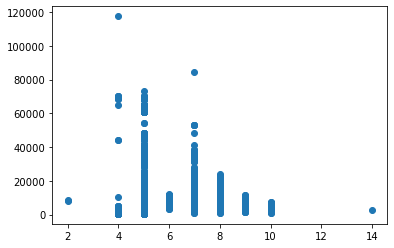

In [17]:
plt.scatter(df['nb_sieges'], df['prix_de_vente'])
plt.show()

Conclusion: Je garde ces variables car elle affectent le prix de la voiture de façon non linéaire

#### Prétraitement des variables catégorielles 

In [18]:
df["nom"].nunique()

1965

il y'a trop de nom de voitures unique our que ce soit considérer comme une variable.
C'est mieux de se limiter à la marque de la voiture

In [19]:
df["marque"] = df["nom"].str.split().str[0]
df.head()

,nom,annee,prix_de_vente,kilometrage,carburant,type_vendeur,transmission,proprietaire,consommation,moteur,puissance,nb_sieges,couple_nm,couple_rpm,marque
0,Toyota Corolla Altis 1.8 J,2009,3995,82000,Essence,Individuel,Manuel,Deuxième Propriétaire,14.53,1798.0,138.0,5.0,173.00,4000.0,Toyota
1,Toyota Fortuner 4x4 MT,2015,23500,20000,Diesel,Individuel,Manuel,Premier Propriétaire,12.55,2982.0,168.0,7.0,343.00,2400.0,Toyota
2,Hyundai Verna Transform CRDi VGT SX ABS,2010,3760,70000,Diesel,Individuel,Manuel,Deuxième Propriétaire,16.20,1493.0,110.0,5.0,235.44,2325.0,Hyundai
3,Ford Figo Diesel Titanium,2011,1821,80000,Diesel,Individuel,Manuel,Troisième Propriétaire,20.00,1399.0,68.0,5.0,160.00,2000.0,Ford
4,Volkswagen Polo 2015-2019 1.0 MPI Comfortline,2019,6874,10000,Essence,Individuel,Manuel,Premier Propriétaire,18.78,999.0,75.0,5.0,95.00,3650.0,Volkswagen


<AxesSubplot:xlabel='marque', ylabel='prix_de_vente'>

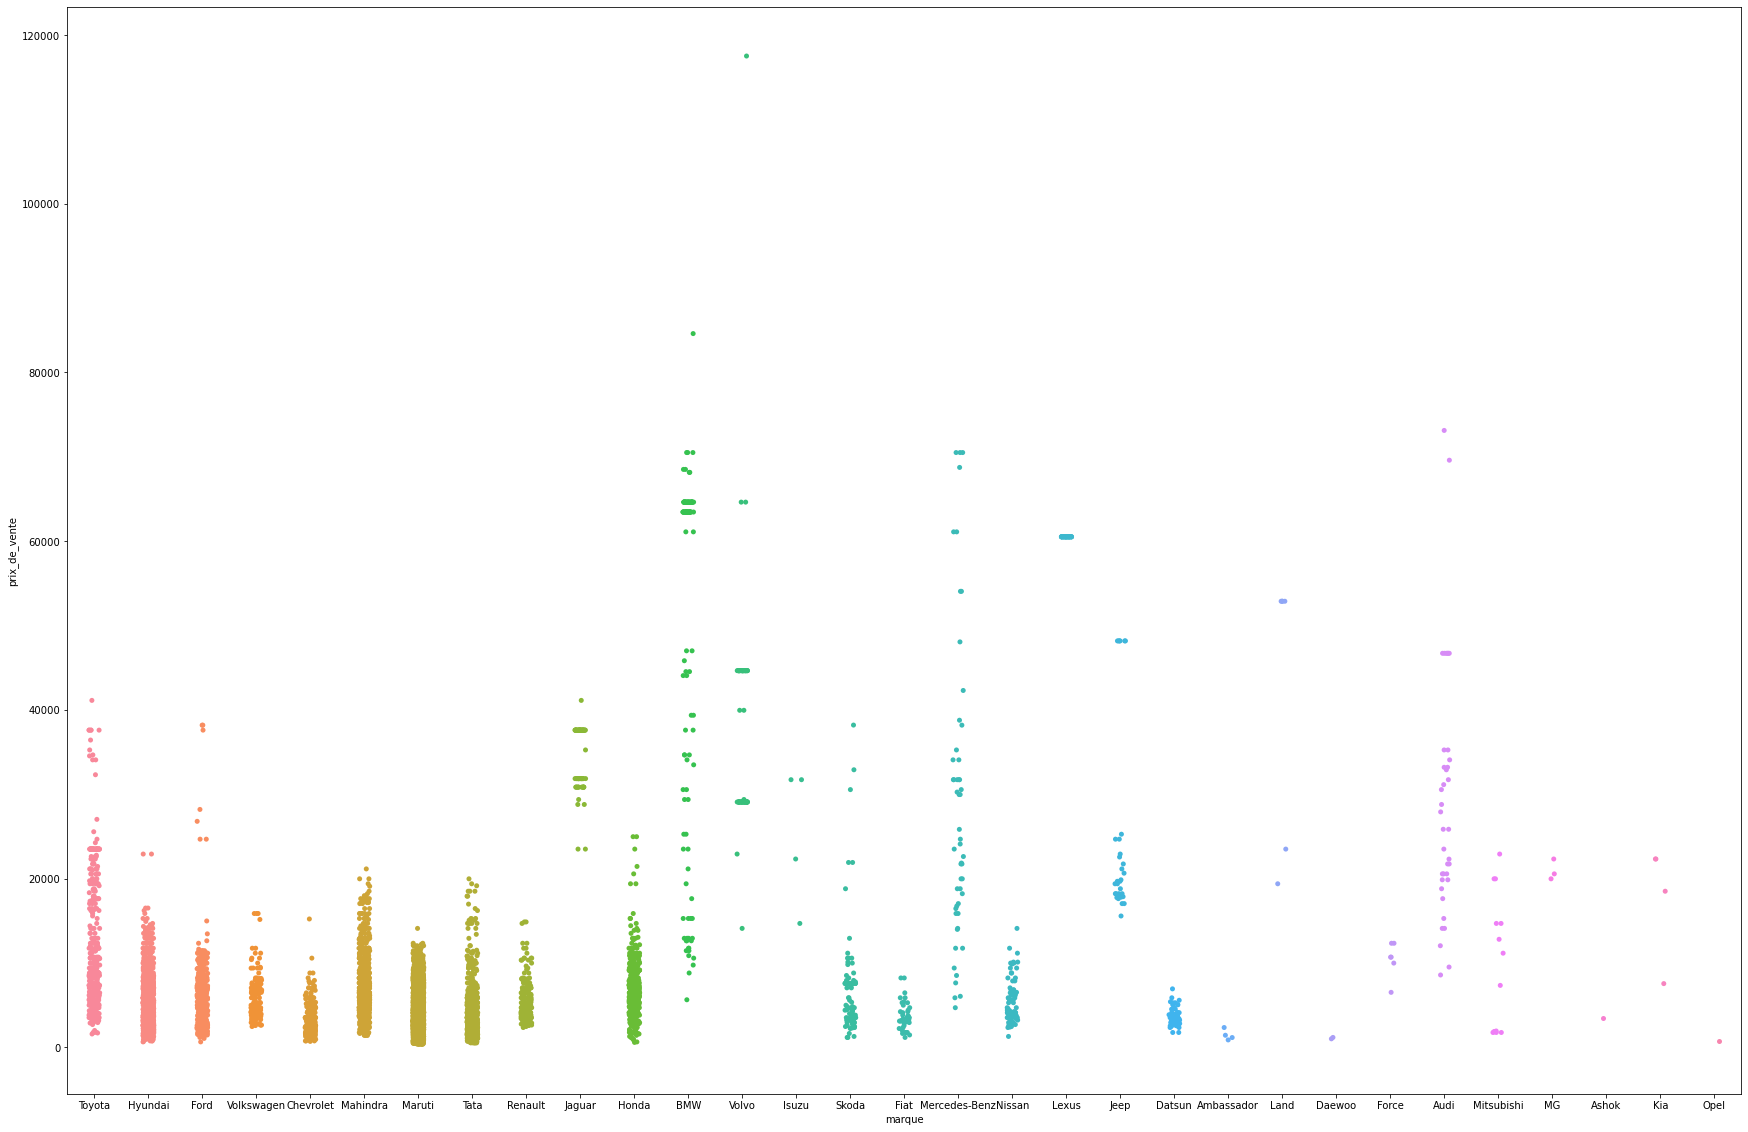

In [20]:
plt.figure(figsize=(30, 20))
sns.stripplot(x="marque", y="prix_de_vente", data=df)

On observe que certaines voitures peuvent coûter beaucoup plus chère que d'autres

In [21]:
df = df.drop(columns=["nom"])
df.head()

,annee,prix_de_vente,kilometrage,carburant,type_vendeur,transmission,proprietaire,consommation,moteur,puissance,nb_sieges,couple_nm,couple_rpm,marque
0,2009,3995,82000,Essence,Individuel,Manuel,Deuxième Propriétaire,14.53,1798.0,138.0,5.0,173.00,4000.0,Toyota
1,2015,23500,20000,Diesel,Individuel,Manuel,Premier Propriétaire,12.55,2982.0,168.0,7.0,343.00,2400.0,Toyota
2,2010,3760,70000,Diesel,Individuel,Manuel,Deuxième Propriétaire,16.20,1493.0,110.0,5.0,235.44,2325.0,Hyundai
3,2011,1821,80000,Diesel,Individuel,Manuel,Troisième Propriétaire,20.00,1399.0,68.0,5.0,160.00,2000.0,Ford
4,2019,6874,10000,Essence,Individuel,Manuel,Premier Propriétaire,18.78,999.0,75.0,5.0,95.00,3650.0,Volkswagen


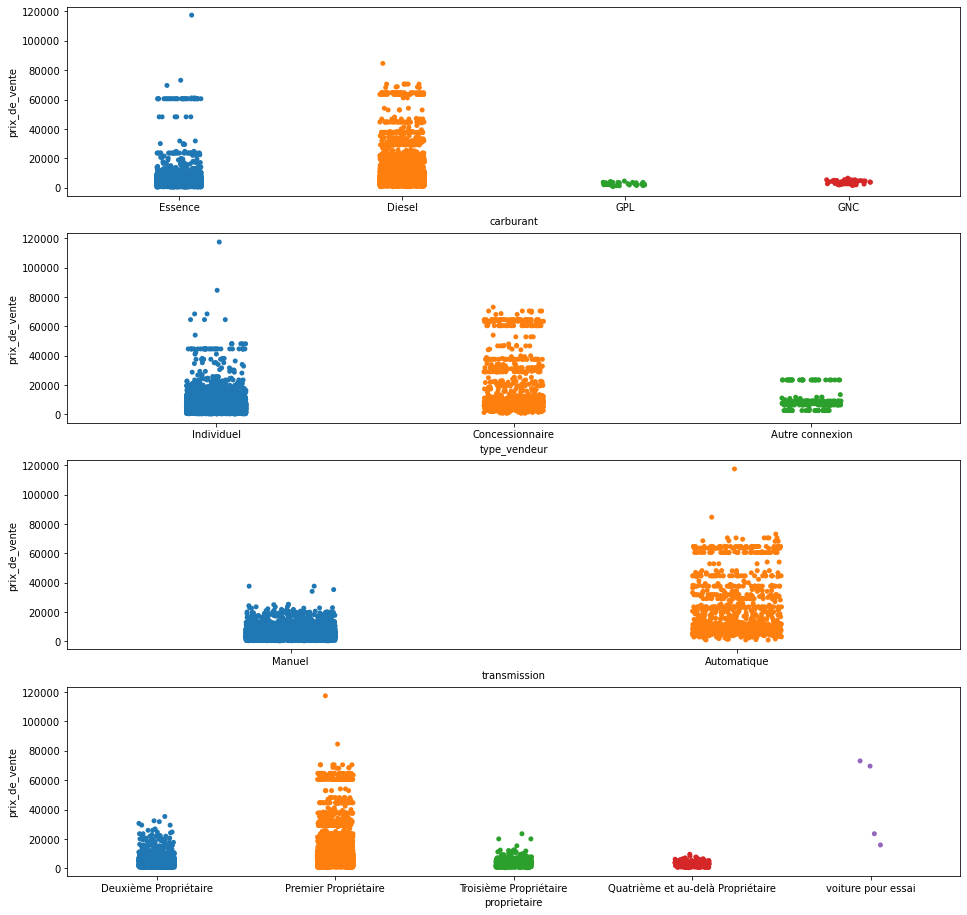

In [22]:
figsize = (16, 16)
cols = ["carburant", "type_vendeur", "transmission", "proprietaire"]
fig, ax = plt.subplots(4,1, figsize=figsize)
for i, ax in enumerate(fig.axes):
    col = cols[i]
    sns.stripplot(x=col, y="prix_de_vente", data=df, ax = ax);

Conclusion: 
    On peut voir que les voitures à essences coute moins chère en général que les voitures Diesel
    Les concessionnaires peuvent couter beaucoup plus chère que les individuelles
    Les voitures manuelles coutes moins chère que les automatique
    Plus il y'a eu de propriètaires moins la voiture coute chère

In [23]:
df.head()

,annee,prix_de_vente,kilometrage,carburant,type_vendeur,transmission,proprietaire,consommation,moteur,puissance,nb_sieges,couple_nm,couple_rpm,marque
0,2009,3995,82000,Essence,Individuel,Manuel,Deuxième Propriétaire,14.53,1798.0,138.0,5.0,173.00,4000.0,Toyota
1,2015,23500,20000,Diesel,Individuel,Manuel,Premier Propriétaire,12.55,2982.0,168.0,7.0,343.00,2400.0,Toyota
2,2010,3760,70000,Diesel,Individuel,Manuel,Deuxième Propriétaire,16.20,1493.0,110.0,5.0,235.44,2325.0,Hyundai
3,2011,1821,80000,Diesel,Individuel,Manuel,Troisième Propriétaire,20.00,1399.0,68.0,5.0,160.00,2000.0,Ford
4,2019,6874,10000,Essence,Individuel,Manuel,Premier Propriétaire,18.78,999.0,75.0,5.0,95.00,3650.0,Volkswagen


#### Encodage des données catégorielles 

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['carburant'] = le.fit_transform(df['carburant'])
df['type_vendeur'] = le.fit_transform(df['type_vendeur'])
df['transmission'] = le.fit_transform(df['transmission'])
df['proprietaire'] = le.fit_transform(df['proprietaire'])
df['marque'] = le.fit_transform(df['marque'])
df.head()

,annee,prix_de_vente,kilometrage,carburant,type_vendeur,transmission,proprietaire,consommation,moteur,puissance,nb_sieges,couple_nm,couple_rpm,marque
0,2009,3995,82000,1,2,1,0,14.53,1798.0,138.0,5.0,173.00,4000.0,28
1,2015,23500,20000,0,2,1,1,12.55,2982.0,168.0,7.0,343.00,2400.0,28
2,2010,3760,70000,0,2,1,0,16.20,1493.0,110.0,5.0,235.44,2325.0,11
3,2011,1821,80000,0,2,1,3,20.00,1399.0,68.0,5.0,160.00,2000.0,9
4,2019,6874,10000,1,2,1,1,18.78,999.0,75.0,5.0,95.00,3650.0,29


On vérifier une dernière fois qu'il y'a pas de cellules vides 

In [25]:
df.isnull().sum()

annee             0
prix_de_vente     0
kilometrage       0
carburant         0
type_vendeur      0
transmission      0
proprietaire      0
consommation      0
moteur            0
puissance         0
nb_sieges         0
couple_nm         0
couple_rpm       34
marque            0
dtype: int64

In [26]:
df = df.dropna()

In [27]:
df.isnull().sum()

annee            0
prix_de_vente    0
kilometrage      0
carburant        0
type_vendeur     0
transmission     0
proprietaire     0
consommation     0
moteur           0
puissance        0
nb_sieges        0
couple_nm        0
couple_rpm       0
marque           0
dtype: int64

### Construction du modèle

In [28]:
X = df.loc[:, ['marque', 'annee', 'kilometrage', 'carburant', 'type_vendeur', 'transmission', 
                 'proprietaire', 'consommation', 'moteur', 'puissance', 'nb_sieges', 'couple_nm', 'couple_rpm' ]]
X.head()

,marque,annee,kilometrage,carburant,type_vendeur,transmission,proprietaire,consommation,moteur,puissance,nb_sieges,couple_nm,couple_rpm
0,28,2009,82000,1,2,1,0,14.53,1798.0,138.0,5.0,173.00,4000.0
1,28,2015,20000,0,2,1,1,12.55,2982.0,168.0,7.0,343.00,2400.0
2,11,2010,70000,0,2,1,0,16.20,1493.0,110.0,5.0,235.44,2325.0
3,9,2011,80000,0,2,1,3,20.00,1399.0,68.0,5.0,160.00,2000.0
4,29,2019,10000,1,2,1,1,18.78,999.0,75.0,5.0,95.00,3650.0


In [29]:
y = df.loc[:, ['prix_de_vente']]
y.head()

,prix_de_vente
0,3995
1,23500
2,3760
3,1821
4,6874


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [31]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### J'ai choisi 4 modèles pour ce problèmes:
#### Linear regression
#### Decision tree regressor
#### Random forest regressor
#### XGB Regressor

In [32]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
print("\t\tLinear regression Error Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy on Training set :", linearRegression.score(X_train,y_train))
print("Accuracy on Test set :", linearRegression.score(X_test,y_test))
print("")

from sklearn.tree import DecisionTreeRegressor
dtRegressor = DecisionTreeRegressor()
dtRegressor.fit(X_train, y_train)
y_pred = dtRegressor.predict(X_test)
print("\t\tDecision Tree Regressor Error Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy on Training set : ", dtRegressor.score(X_train,y_train))
print("Accuracy on Test set : ", dtRegressor.score(X_test,y_test))
print("")

from sklearn.ensemble import RandomForestRegressor
rfRegressor = RandomForestRegressor()
rfRegressor.fit(X_train, y_train)
y_pred = rfRegressor.predict(X_test)
print("\t\tRandom Forest Regressor Error Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy on Training set : ", rfRegressor.score(X_train,y_train))
print("Accuracy on Test set : ", rfRegressor.score(X_test,y_test))
print("")

!pip install xgboost
from xgboost import XGBRegressor
xgbRegressor = XGBRegressor()
xgbRegressor.fit(X_train, y_train)
y_pred = xgbRegressor.predict(X_test)
print("\t\tXGBRegressor Error Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy on Training set : ", xgbRegressor.score(X_train,y_train))
print("Accuracy on Test set : ", xgbRegressor.score(X_test,y_test))

		Linear regression Error Table
Mean Absolute Error      :  3285.2574076282435
Mean Squared  Error      :  29782692.15178709
Root Mean Squared  Error :  5457.35211909467
Accuracy on Training set : 0.6716258179335516
Accuracy on Test set : 0.6462980665287942

		Decision Tree Regressor Error Table
Mean Absolute Error      :  886.0440977517106
Root Mean Squared  Error :  1644.0289232030227
Accuracy on Training set :  0.9996050491773518
Accuracy on Test set :  0.9679009345038411



<ipython-input-32-54c8414759d8>:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfRegressor.fit(X_train, y_train)


		Random Forest Regressor Error Table
Mean Absolute Error      :  760.2022556400735
Root Mean Squared  Error :  1412.6696809394177
Accuracy on Training set :  0.9945424773977174
Accuracy on Test set :  0.976299651611947

		XGBRegressor Error Table
Mean Absolute Error      :  731.5305033890919
Root Mean Squared  Error :  1382.0036049175396
Accuracy on Training set :  0.9957716377805639
Accuracy on Test set :  0.9773174522830911


Le meilleur modèle est le XGB Regressor

### Comparaison graphique entre la prédiction et les valeurs réelles

In [33]:
def visual_prediction(nmberofpredictions, y_real, y_predicted):
    y_0 = y_real
    y_1 = y_predicted
    L=[x for x in range(nmberofpredictions)]
    plt.figure(figsize=(25,10)) 
    plt.plot(L, y_0[:nmberofpredictions], marker='.', label="actual")
    plt.plot(L, y_1[:nmberofpredictions], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(nmberofpredictions), size=15)
    plt.legend(fontsize=15)
    plt.show()

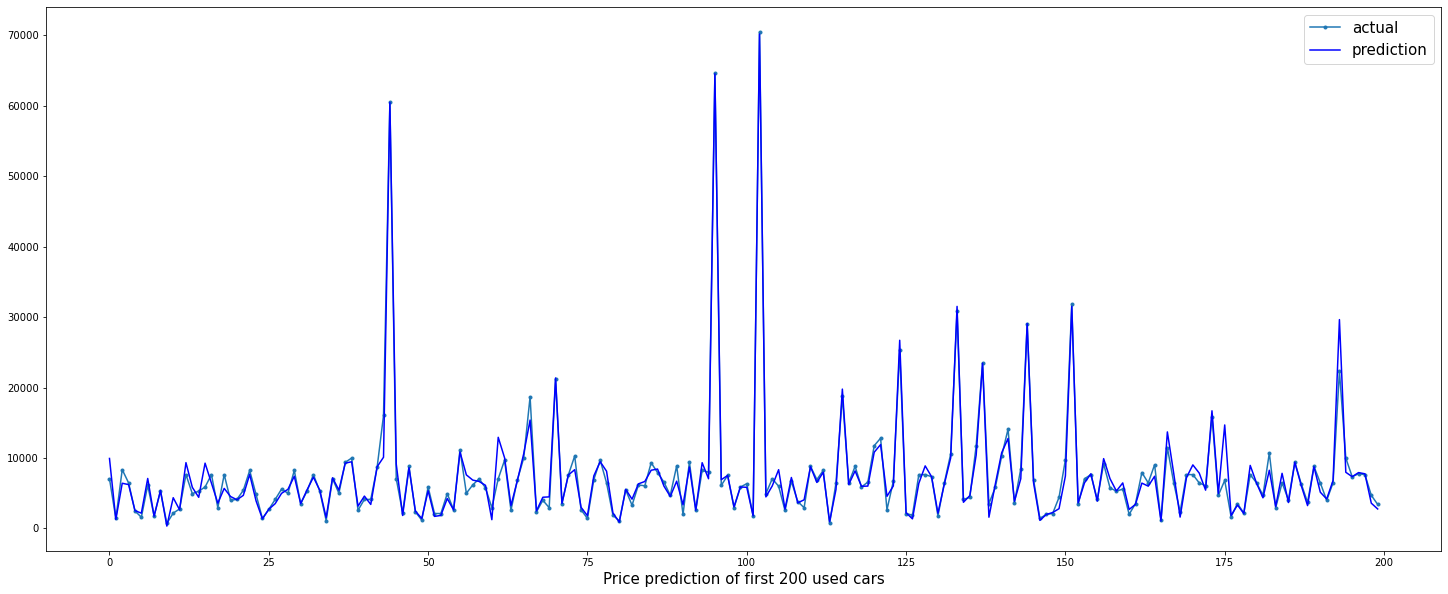

In [34]:
visual_prediction(200, y_test, y_pred)

In [35]:
def prix_voiture(nom, annee, kilometrage, carburant, type_vendeur, transmission, proprietaire,
              consommation, moteur, puissance, couple,  nb_sieges):
    
    data = pd.read_csv("Esigar.csv", sep =';', encoding = 'latin-1')
    data.dropna(inplace = True)
    data = data.append({'nom':nom, 'annee':annee, 'kilometrage':kilometrage, 'carburant':carburant,'type_vendeur':type_vendeur, 
                       'transmission': transmission, 'proprietaire':proprietaire, 'consommation':consommation,
                       'moteur':moteur, 'puissance':puissance, 'couple':couple, 'nb_sieges':nb_sieges}, ignore_index=True)
    
    data['nom_voiture'] = data['nom']
    
    data["nom"] = data["nom"].apply(lambda x:re.findall("\d+", x)).str[0].astype(float)
    data["consommation"] = data["consommation"].apply(lambda x:re.findall("\d+", x)).str[0].astype(float)
    data["moteur"] = data["moteur"].apply(lambda x:re.findall("\d+", x)).str[0].astype(float)
    data["puissance"] = data["puissance"].apply(lambda x:re.findall("\d+", x)).str[0].astype(float)
    
    data["couple_nm"] = data["couple"].apply(lambda x:re.findall("\d+", x)).str[0].astype(float)
    data["couple_rpm_min"] = data["couple"].apply(lambda x:re.findall("\d+", x)).str[1].astype(float)
    data["couple_rpm_max"] = data["couple"].apply(lambda x:re.findall("\d+", x)).str[2].astype(float)
    data["couple_rpm"] = data[["couple_rpm_min", "couple_rpm_max"]].mean(1)
    data = data.drop(columns=["couple_rpm_min", "couple_rpm_max", "couple"])
    
    le = LabelEncoder()
    data['nom'] = le.fit_transform(data['nom'])
    data['carburant'] = le.fit_transform(data['carburant'])
    data['type_vendeur'] = le.fit_transform(data['type_vendeur'])
    data['transmission'] = le.fit_transform(data['transmission'])
    data['proprietaire'] = le.fit_transform(data['proprietaire'])
    
    #Model prediction
    X_test = data.loc[:, ['nom', 'annee', 'kilometrage', 'moteur', 'carburant', 'type_vendeur',
                        'transmission', 'proprietaire', 'consommation', 'puissance', 'nb_sieges', 'couple_nm', 'couple_rpm' ]]
    y_test = data.loc[:, ['prix_de_vente']]
    xgbRegressor = XGBRegressor()
    xgbRegressor.fit(X_train, y_train)
    y_pred = xgbRegressor.predict(X_test)
    submission = pd.DataFrame({'Voiture':data['nom_voiture'],'Prix':y_pred}) 
    
    return submission.tail(1)

In [36]:
prix_voiture('BMW X6', 2022, 0, 'Essence', 'Concessionnaire', 'Automatique', 'Premier Propriétaire', '24.54 kmpl', '2000 CC', '205 bhp', '231 Nm@87', 5.0)

,Voiture,Prix
7781,BMW X6,65975.617188


In [37]:
def prix_jeu_de_voiture(file):
    with open(file, "r") as csvfile:
        data = pd.read_csv(csvfile, sep=';', encoding = 'latin-1')
        data.dropna(inplace = True)
        
        data['nom_voiture'] = data['nom']
        
        data["nom"] = data["nom"].apply(lambda x:re.findall("\d+", x)).str[0].astype(float)
        data["consommation"] = data["consommation"].apply(lambda x:re.findall("\d+", x)).str[0].astype(float)
        data["moteur"] = data["moteur"].apply(lambda x:re.findall("\d+", x)).str[0].astype(float)
        data["puissance"] = data["puissance"].apply(lambda x:re.findall("\d+", x)).str[0].astype(float)
    
        data["couple_nm"] = data["couple"].apply(lambda x:re.findall("\d+", x)).str[0].astype(float)
        data["couple_rpm_min"] = data["couple"].apply(lambda x:re.findall("\d+", x)).str[1].astype(float)
        data["couple_rpm_max"] = data["couple"].apply(lambda x:re.findall("\d+", x)).str[2].astype(float)
        data["couple_rpm"] = data[["couple_rpm_min", "couple_rpm_max"]].mean(1)
        data = data.drop(columns=["couple_rpm_min", "couple_rpm_max", "couple"])
        
        le = LabelEncoder()
        data['nom'] = le.fit_transform(data['nom'])
        data['carburant'] = le.fit_transform(data['carburant'])
        data['type_vendeur'] = le.fit_transform(data['type_vendeur'])
        data['transmission'] = le.fit_transform(data['transmission'])
        data['proprietaire'] = le.fit_transform(data['proprietaire'])
        
        #Model prediction
        X_test = data.loc[:, ['nom', 'annee', 'kilometrage', 'moteur', 'carburant', 'type_vendeur', 'transmission', 
                            'proprietaire', 'consommation', 'puissance', 'nb_sieges', 'couple_nm', 'couple_rpm'  ]]
        
        #y_test = df.loc[:, ['prix_de_vente']]
        xgbRegressor = XGBRegressor()
        xgbRegressor.fit(X_train, y_train)
        y_pred = xgbRegressor.predict(X_test)
        submission = pd.DataFrame({'Voiture':data['nom_voiture'],'Prix':y_pred}) 
        
        return submission

In [38]:
prix_jeu_de_voiture('C:/Users/user1/Documents/semestre 9/Artificial intelligence/test.csv')

,Voiture,Prix
0,Toyota Corolla Altis 1.8 J,4935.094238
1,Toyota Fortuner 4x4 MT,17712.132812
2,Hyundai Verna Transform CRDi VGT SX ABS,3950.226562
3,Ford Figo Diesel Titanium,2869.348877
4,Volkswagen Polo 2015-2019 1.0 MPI Comfortline,5794.926270
...,...,...
7995,Tata Indigo eCS LX TDI BSIII,2810.751709
7996,Volkswagen Polo 2015-2019 1.2 MPI Highline Plus,6602.409180
7997,Maruti Alto 800 LXI,2045.221558
7998,Jaguar XE 2016-2019 2.0L Diesel Prestige,25169.794922
